In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm

In [10]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)

In [25]:
Spotify = pd.read_csv('/Users/Camer/Downloads/Spring 2025 Classes/Stat 411/Projects/Project 2/Datasets/data.csv')
Spotify.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [30]:
Spotify.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,142761.000000,142761.000000,142761.000000,142761.000000,1.427610e+05,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000
mean,0.532026,1983.466577,0.434115,0.544036,2.341798e+05,0.523557,0.083895,0.131680,5.199732,0.202430,-10.744211,0.709073,37.572796,0.080098,118.455797
std,0.262220,22.152608,0.356590,0.174606,1.188998e+05,0.262370,0.277232,0.282739,3.516955,0.176639,5.413633,0.454191,18.404962,0.113958,30.384292
min,0.000000,1921.000000,0.000000,0.000000,1.470800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,1.000000,0.000000,0.000000
25%,0.321000,1966.000000,0.070100,0.427000,1.738400e+05,0.312000,0.000000,0.000000,2.000000,0.095900,-13.578000,0.000000,25.000000,0.034000,95.090000
50%,0.540000,1984.000000,0.384000,0.554000,2.147600e+05,0.530000,0.000000,0.000093,5.000000,0.131000,-9.845000,1.000000,38.000000,0.043300,115.999000
75%,0.750000,2002.000000,0.789000,0.670000,2.670400e+05,0.739000,0.000000,0.028900,8.000000,0.254000,-6.730000,1.000000,51.000000,0.069400,137.183000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.969000,243.507000


In [31]:
Spotify.shape

(142761, 19)

In [32]:
Spotify.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [43]:
# Find indices where popularity is zero
indices_to_drop = Spotify[Spotify['popularity'] == 0].index

# Drop those rows
Spotify.drop(indices_to_drop, inplace=True)

In [47]:
model = MS(Spotify.columns.drop(['year', 'artists', 'duration_ms', 'id', 'name', 'release_date', 'popularity']), intercept = False)
D = model.fit_transform(Spotify)
feature_names = list(D.columns)
X = np.asarray(D)

In [48]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                Spotify['popularity'],
                                test_size = 0.3,
                                random_state = 0)

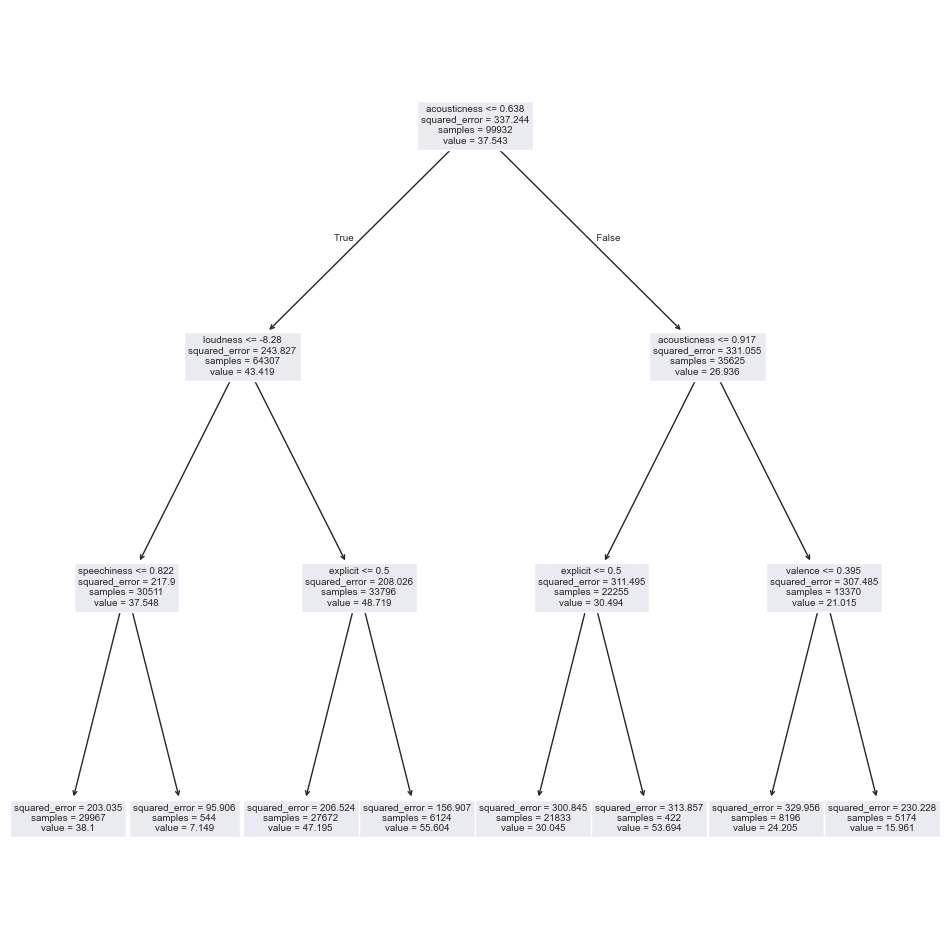

In [49]:
reg = DTR(max_depth = 3)
reg.fit(X_train, y_train)
ax = subplots(figsize = (12, 12))[1]
plot_tree(reg,
          feature_names = feature_names,
          ax = ax);

In [50]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle = True,
                  random_state = 10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit = True,
                        cv = kfold,
                        scoring = 'neg_mean_squared_error',)
G = grid.fit(X_train, y_train)

[Text(0.5, 0.875, 'acousticness <= 0.638\nsquared_error = 337.244\nsamples = 99932\nvalue = 37.543'),
 Text(0.25, 0.625, 'loudness <= -8.28\nsquared_error = 243.827\nsamples = 64307\nvalue = 43.419'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'speechiness <= 0.822\nsquared_error = 217.9\nsamples = 30511\nvalue = 37.548'),
 Text(0.0625, 0.125, 'squared_error = 203.035\nsamples = 29967\nvalue = 38.1'),
 Text(0.1875, 0.125, 'squared_error = 95.906\nsamples = 544\nvalue = 7.149'),
 Text(0.375, 0.375, 'explicit <= 0.5\nsquared_error = 208.026\nsamples = 33796\nvalue = 48.719'),
 Text(0.3125, 0.125, 'squared_error = 206.524\nsamples = 27672\nvalue = 47.195'),
 Text(0.4375, 0.125, 'squared_error = 156.907\nsamples = 6124\nvalue = 55.604'),
 Text(0.75, 0.625, 'acousticness <= 0.917\nsquared_error = 331.055\nsamples = 35625\nvalue = 26.936'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'explicit <= 0.5\nsquared_error = 311.495\nsamples = 22255\nvalue = 30.494'),
 Text(0.5625, 0.1

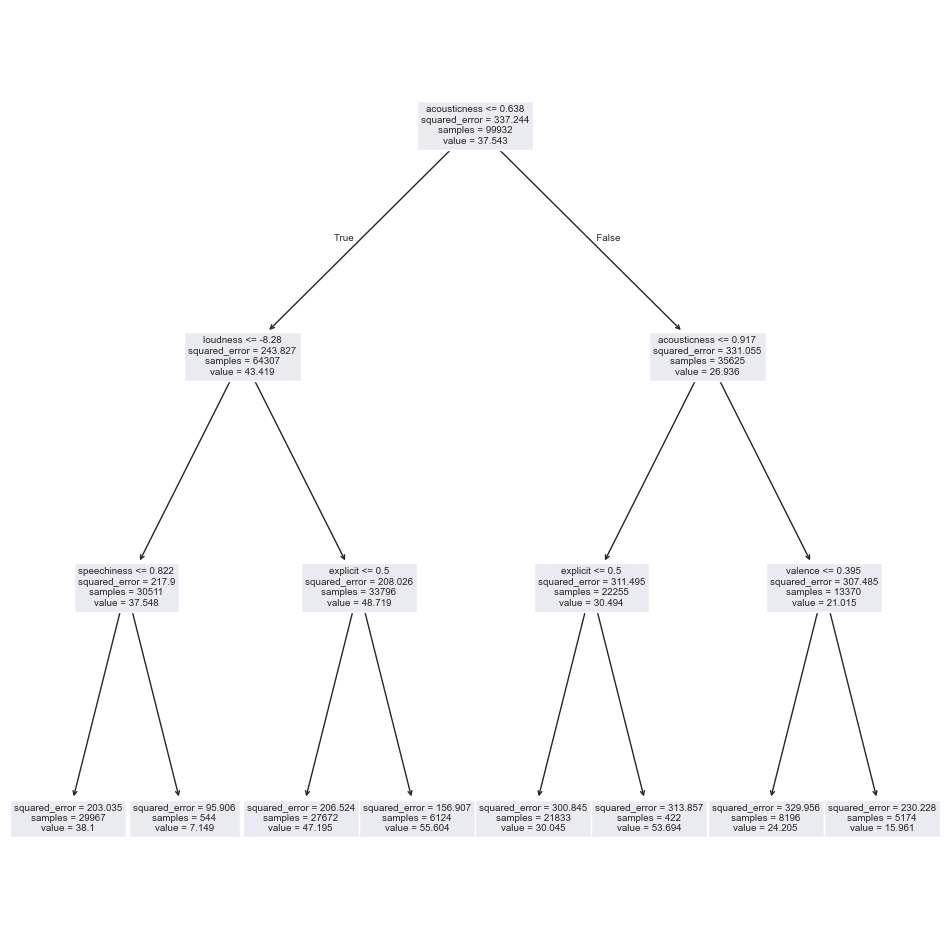

In [51]:
ax = subplots(figsize = (12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names = feature_names,
          ax = ax)